In [1]:
!pip install category_encoders
!pip install sklearn


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [3]:
train = pd.read_csv('test.csv')

# EDA + Feature Engineering

Сделаем признаки Group (вычленим группу из PassangerId) и разобъём признак Cabin на составляющие 

In [4]:
train['Group'] = train.PassengerId.str.split("_").str[0]
train['Deck'] = train.Cabin.str.split("/").str[0]
train['Num'] = train.Cabin.str.split("/").str[1]
train['Side'] = train.Cabin.str.split("/").str[2]


train.head()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Deck,Num,Side
0,0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,G,3,S
1,1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,F,4,S
2,2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,C,0,S
3,3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,C,1,S
4,4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,F,5,S


...и удалим ненужные признаки.

In [5]:
train = train.drop(columns="PassengerId")
train = train.drop(columns="Cabin")

## Encode'им категориальные признаки

Сначала посмотрим на Home.

<Axes: >

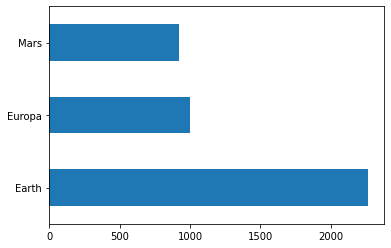

In [6]:
train.HomePlanet.value_counts().plot.barh()

Для кодирования используем count encoder

In [7]:
train.to_csv('test.csv')